# Project Overview and Purpose

This is a project from Google Advanced Data Analytics.

We aim to conduct a data analytics project for Waze. As a part of this project, we are willing to analyze to analyze the relationship between mean amount of rides and device type (iPhone, Android).


In [2]:
# import libraries

import numpy as np
import pandas as pd
import scipy


In [3]:
Waze_data = pd.read_csv("C:\\Users\\Amirhossein Hosseini\\OneDrive - Queen's University\\Coursera_Google_Advanced_Data_Analytics_Professional\\waze_dataset.csv")


In [4]:
Waze_data.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone




`label`: Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 

`sessions`: The number of occurrence of a user opening the app during the month

`drives`: An occurrence of driving at least 1 km during the month

`device`: The type of device a user starts a session with

`total_sessions`: A model estimate of the total number of sessions since a user has onboarded

`n_days_after_onboarding`:The number of days since a user signed up for the app

`total_navigations_fav1`: Total navigations since onboarding to the user’s favorite place 1

`total_navigations_fav2`: Total navigations since onboarding to the user’s favorite place 2

`driven_km_drives`: Total kilometers driven during the month

`duration_minutes_drives`: Total duration driven in minutes during the month

`activity_days`: Number of days the user opens the app during the month 

`driving_days`: Number of days the user drives (at least 1 km) during the month

In [5]:
Waze_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
Waze_data.describe(include='all')

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,4329.982679,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,3749.500000,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,7499.000000,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,11248.500000,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


In [7]:
Waze_data.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [11]:
null_df = Waze_data[Waze_data['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [12]:
not_null_df = Waze_data[~Waze_data['label'].isnull()]
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [9]:
Waze_data['device'].value_counts()


iPhone     9672
Android    5327
Name: device, dtype: int64

Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

There is no missing values in target columns (duration_minutes_drives and device). Therefore, we can keep all the rows for this analysis.

**Question**: How many iPhone users had null values and how many Android users had null values?

In [13]:
null_df['device'].value_counts()


iPhone     447
Android    253
Name: device, dtype: int64

In [14]:
null_df['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [16]:
Waze_data['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

In [17]:
print(Waze_data['label'].value_counts())
print()
print(Waze_data['label'].value_counts(normalize=True))

retained    11763
churned      2536
Name: label, dtype: int64

retained    0.822645
churned     0.177355
Name: label, dtype: float64


In [18]:
Waze_data.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile. Continue exploring!

In [19]:
medians_by_label = Waze_data.groupby('label').median(numeric_only=True)
print('Median kilometers per drive:')
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

In [20]:
print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

In [21]:
print('Median drives per driving day:')
medians_by_label['drives'] / medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of churned users—contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

In [22]:
Waze_data.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [23]:
Waze_data.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.

# Visualizations

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

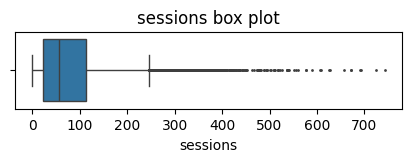

In [27]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['sessions'], fliersize=1)
plt.title('sessions box plot');

In [20]:
Waze_data['duration_minutes_drives'].groupby(Waze_data['device']).mean()

device
Android    1869.570741
iPhone     1856.242335
Name: duration_minutes_drives, dtype: float64

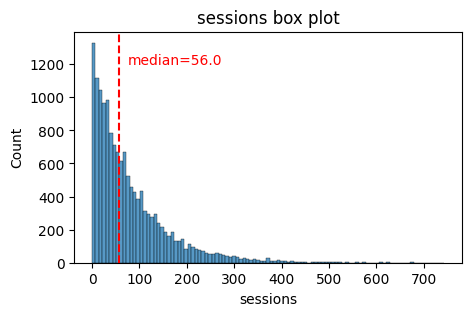

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(x=Waze_data['sessions'])
median = Waze_data['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

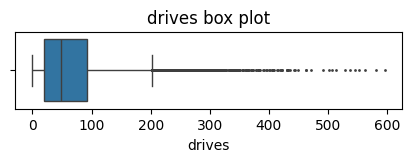

In [29]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['drives'], fliersize=1)
plt.title('drives box plot');

In [34]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(Waze_data[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=Waze_data[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

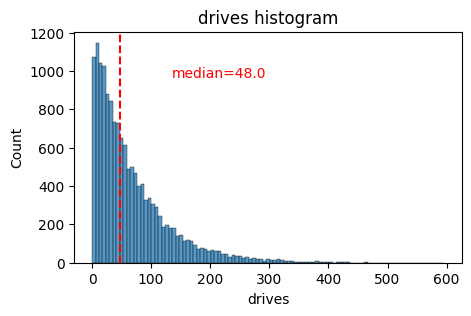

In [35]:
histogrammer('drives')


The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

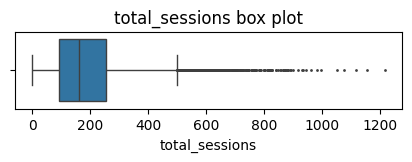

In [36]:

plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

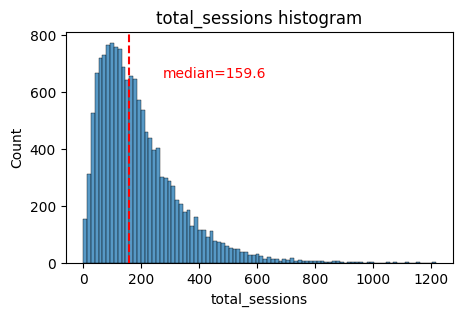

In [37]:
histogrammer('total_sessions')

The total_sessions is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. This is something you can examine more closely later.

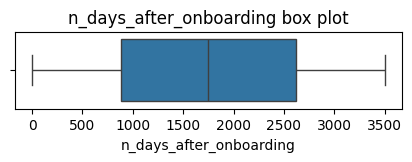

In [38]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


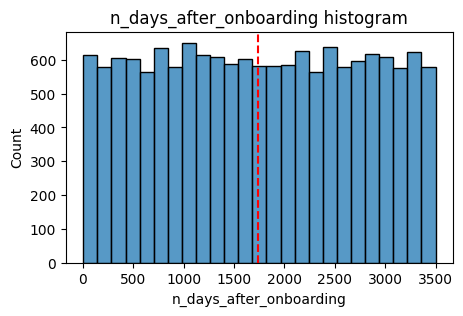

In [39]:
histogrammer('n_days_after_onboarding', median_text=False)


The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

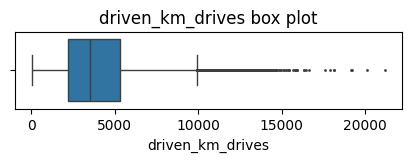

In [40]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

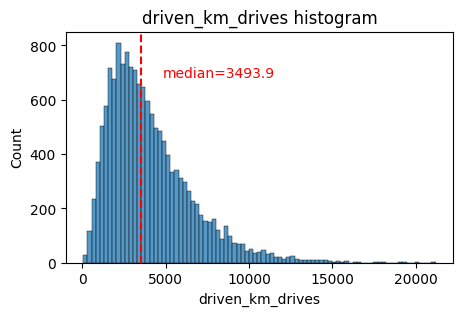

In [41]:
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive a lot. The longest distance driven in the month was over half the circumferene of the earth.

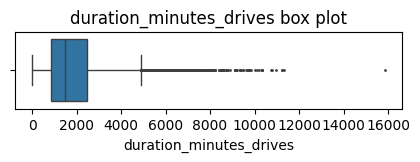

In [42]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

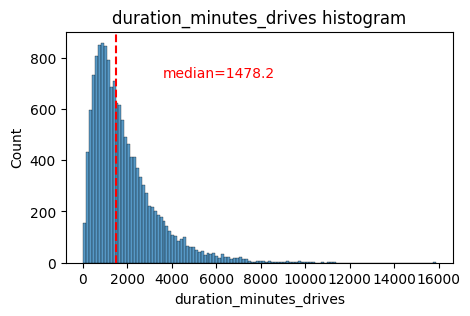

In [43]:
histogrammer('duration_minutes_drives')

The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

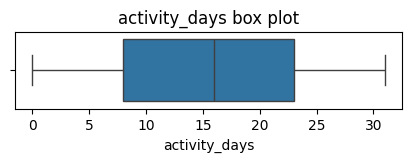

In [44]:
plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


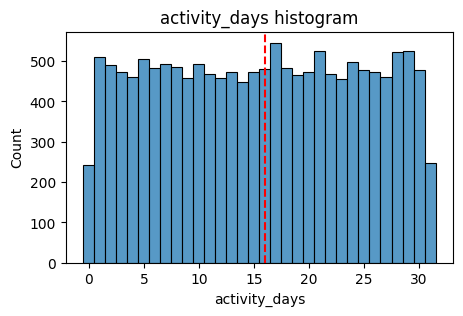

In [45]:
histogrammer('activity_days', median_text=False, discrete=True)


Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the sessions distribution, which you might think would be closely correlated with activity_days.

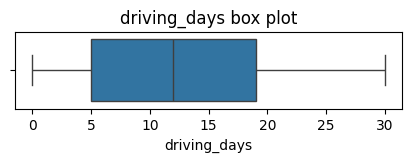

In [46]:

plt.figure(figsize=(5,1))
sns.boxplot(x=Waze_data['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


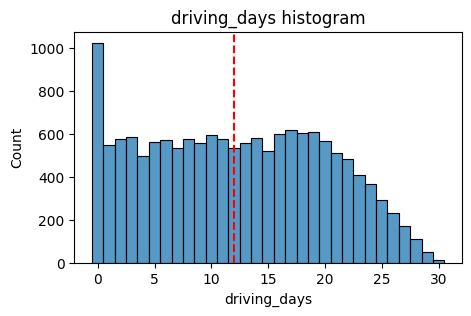

In [47]:
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.

However, there were almost twice as many users (~1,000 vs. ~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from activity_days. That variable had ~500 users opening the app on each of most of the day counts, but there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

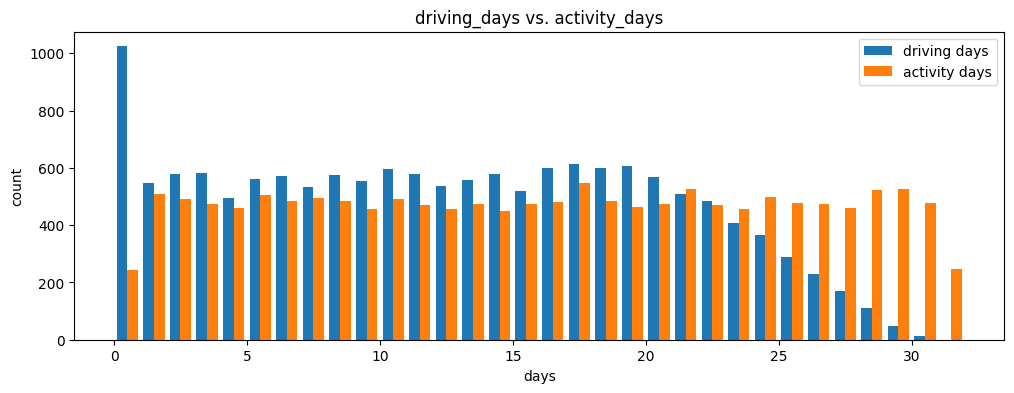

In [48]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([Waze_data['driving_days'], Waze_data['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

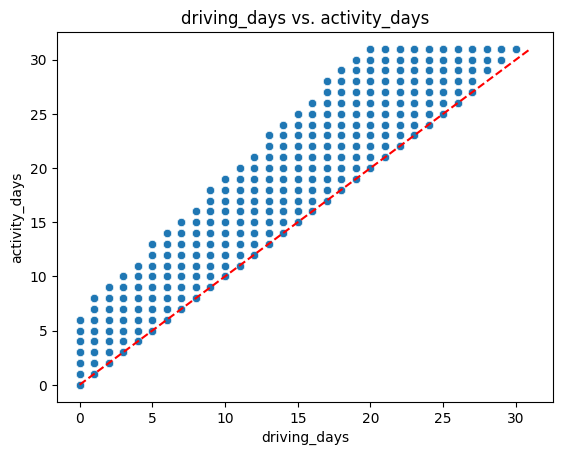

In [49]:
sns.scatterplot(data=Waze_data, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

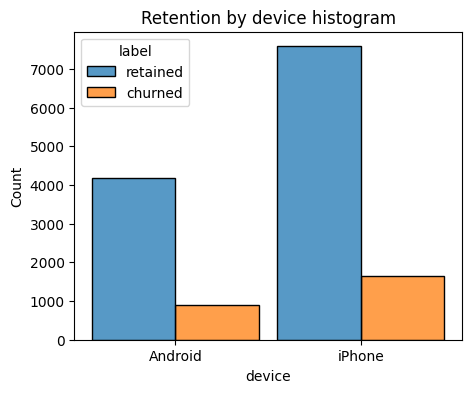

In [50]:
plt.figure(figsize=(5,4))
sns.histplot(data=Waze_data,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.



In [51]:
# 1. Create `km_per_driving_day` column
Waze_data['km_per_driving_day'] = Waze_data['driven_km_drives'] / Waze_data['driving_days']

# 2. Call `describe()` on the new column
Waze_data['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [52]:
Waze_data.loc[Waze_data['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
Waze_data['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers per drive day. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

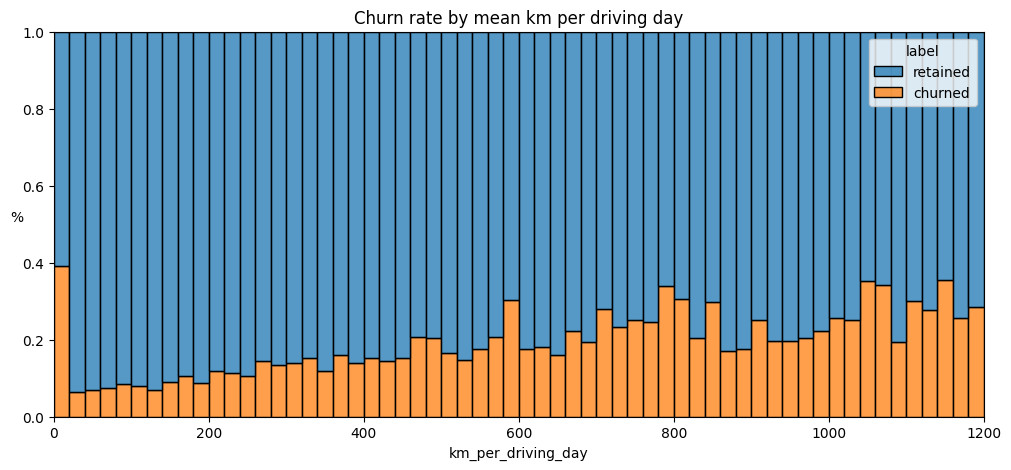

In [53]:
plt.figure(figsize=(12,5))
sns.histplot(data=Waze_data,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

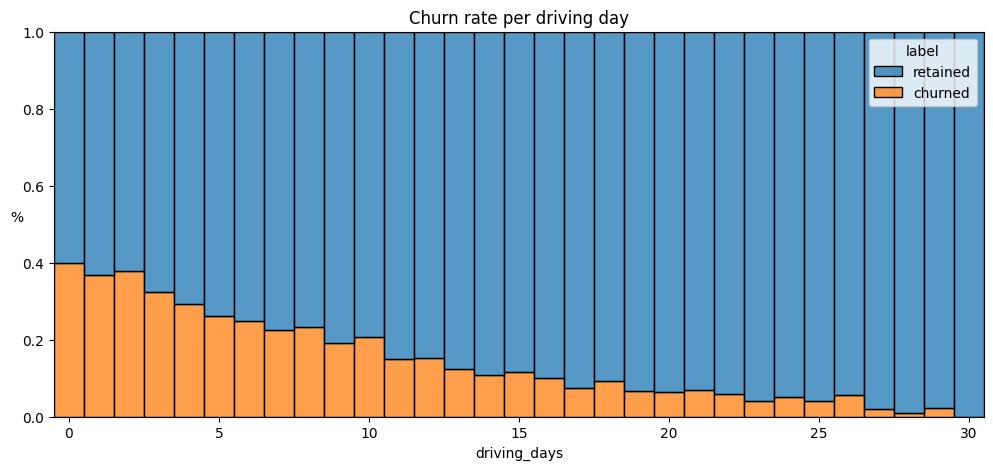

In [54]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=Waze_data,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

In [55]:

Waze_data['percent_sessions_in_last_month'] = Waze_data['sessions'] / Waze_data['total_sessions']

In [56]:
Waze_data['percent_sessions_in_last_month'].median()

0.42309702992763176

Median: 0.4


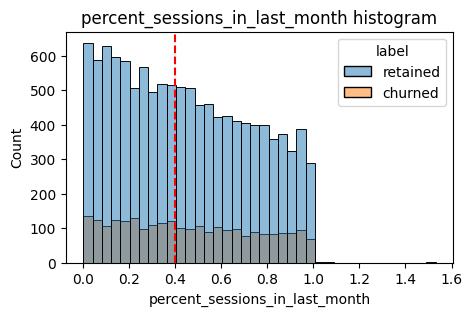

In [57]:
histogrammer('percent_sessions_in_last_month',
             hue=Waze_data['label'],
             multiple='layer',
             median_text=False)

In [58]:
Waze_data['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

# Handling outliers

In [59]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = Waze_data[column_name].quantile(percentile)
    Waze_data.loc[Waze_data[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [60]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [61]:
Waze_data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


Based on the averages shown, it appears that customers with Android device use the app more. However, this difference might arise from random sampling, rather than being a true difference in average number of drives. To assess whether the difference is statistically significant, we conduct a hypothesis test.

# A/B test

We aim to conduct an A/B test using a two-sample t-test with the significance level of %5.

Null hypothesis: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Alternative hypothesis: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Note that we can assume the normal samples t-distribution are close to normal distribution since the number of samples are large.

In [21]:
scipy.stats.ttest_ind(Waze_data.loc[Waze_data['device'] == 'Android', 'drives'],
                      Waze_data.loc[Waze_data['device'] == 'iPhone', 'drives'],
                      equal_var=False)

Ttest_indResult(statistic=-1.463523206885235, pvalue=0.14335197268020597)

**Results and recommendations**

p_value > 0.05. So, we fail to reject the null hypothesis and conclude that there is no statistically significant difference  in the average number of drives between drivers who use iPhones and drivers who use Androids.

The key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids.

# Linear Regression

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [64]:
# Create `km_per_driving_day` column
Waze_data['km_per_driving_day'] = Waze_data['driven_km_drives'] / Waze_data['driving_days']

Waze_data['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.226746e+02
75%      7.370429e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [65]:
Waze_data.loc[Waze_data['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

Waze_data['km_per_driving_day'].describe()

count    14999.000000
mean       564.332421
std        963.973921
min          0.000000
25%        136.238895
50%        272.889272
75%        542.953671
max       8889.794236
Name: km_per_driving_day, dtype: float64

In [66]:
# Create `professional_driver` column
Waze_data['professional_driver'] = np.where((Waze_data['drives'] >= 60) & (Waze_data['driving_days'] >= 15), 1, 0)

In [67]:
# 1. Check count of professionals and non-professionals
print(Waze_data['professional_driver'].value_counts())

# 2. Check in-class churn rate
Waze_data.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

In [70]:
# Drop rows with missing data in `label` column
Waze_data = Waze_data.dropna(subset=['label'])

In [72]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = Waze_data[column].quantile(0.95)
    Waze_data.loc[Waze_data[column] > threshold, column] = threshold

In [73]:
Waze_data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,76.539688,63.964683,183.663233,1751.822505,114.562767,27.187216,3944.110515,1792.911210,15.544653,12.182530,566.943907,0.449837,0.173998
std,4331.207621,67.243178,55.127927,118.596924,1008.663834,124.378550,36.715302,2217.358063,1224.329759,9.016088,7.833835,969.897544,0.286863,0.379121
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890,0.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310,0.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,543.473676,0.687251,0.000000
max,14998.000000,243.000000,200.000000,454.363204,3500.000000,422.000000,124.000000,8889.794236,4668.180092,31.000000,30.000000,8889.794236,1.530637,1.000000


In [74]:
# Create binary `label2` column
Waze_data['label2'] = np.where(Waze_data['label']=='churned', 1, 0)
Waze_data[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


### Collinearity

In [75]:
# Generate a correlation matrix
Waze_data.corr(method='pearson')

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,label2
ID,1.000000,0.011611,0.010749,0.005553,-0.005300,0.000606,-0.003195,0.000481,0.001909,-0.000891,-0.000981,-0.004597,0.009682,0.012436,0.004425
sessions,0.011611,1.000000,0.996942,0.597299,0.007101,0.001858,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.012541,0.614136,0.443654,0.034911
drives,0.010749,0.996942,1.000000,0.595396,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.011930,0.614282,0.444425,0.035865
total_sessions,0.005553,0.597299,0.595396,1.000000,0.006615,0.000194,0.010363,0.001015,-0.000345,0.015757,0.012957,-0.015712,-0.113455,0.254532,0.024568
n_days_after_onboarding,-0.005300,0.007101,0.006940,0.006615,1.000000,-0.002450,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.011042,-0.000874,0.003770,-0.129263
total_navigations_fav1,0.000606,0.001858,0.001058,0.000194,-0.002450,1.000000,0.002866,-0.007365,0.005646,0.010902,0.010419,0.000248,0.015180,-0.000224,0.052322
total_navigations_fav2,-0.003195,0.008536,0.009505,0.010363,-0.004968,0.002866,1.000000,0.003567,-0.003009,-0.004425,0.002000,0.004987,0.000603,0.007126,0.015032
driven_km_drives,0.000481,0.002995,0.003445,0.001015,-0.004655,-0.007365,0.003567,1.000000,0.690547,-0.007445,-0.009550,0.334570,-0.002088,-0.000901,0.019771
duration_minutes_drives,0.001909,-0.004545,-0.003889,-0.000345,-0.010167,0.005646,-0.003009,0.690547,1.000000,-0.007895,-0.009425,0.233239,-0.007884,-0.012128,0.040407
activity_days,-0.000891,0.025113,0.024357,0.015757,-0.009418,0.010902,-0.004425,-0.007445,-0.007895,1.000000,0.947687,-0.414920,0.017840,0.453825,-0.303851


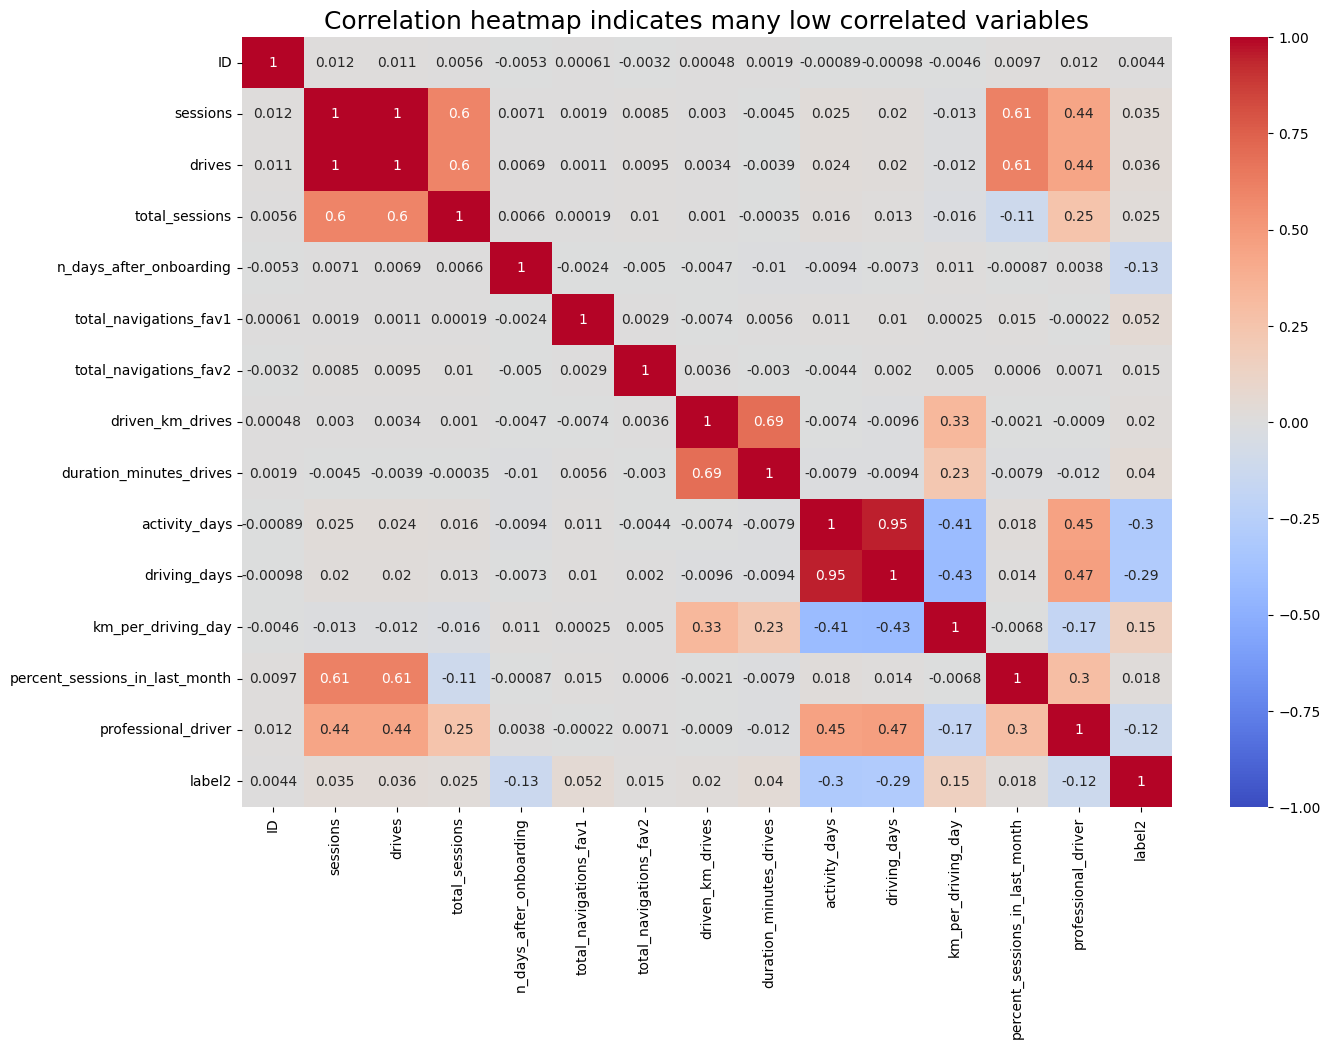

In [77]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(Waze_data.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

In [78]:
# Create new `device2` variable
Waze_data['device2'] = np.where(Waze_data['device']=='Android', 0, 1)
Waze_data[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [79]:
X = Waze_data.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [80]:

y = Waze_data['label2']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [82]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)

C:\Users\Amirhossein Hosseini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

In [83]:
pd.Series(model.coef_[0], index=X.columns)

ID                                0.000003
drives                            0.001906
total_sessions                    0.000310
n_days_after_onboarding          -0.000409
total_navigations_fav1            0.001216
total_navigations_fav2            0.000907
driven_km_drives                 -0.000015
duration_minutes_drives           0.000109
activity_days                    -0.106504
km_per_driving_day                0.000015
percent_sessions_in_last_month   -0.000657
professional_driver              -0.001603
device2                          -0.000907
dtype: float64

In [84]:
model.intercept_

array([-0.001482])

### Check final assumption
Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [85]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.94145769, 0.05854231],
       [0.61662589, 0.38337411],
       [0.76253851, 0.23746149],
       ...,
       [0.92017183, 0.07982817],
       [0.85252409, 0.14747591],
       [0.93474985, 0.06525015]])

In [86]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

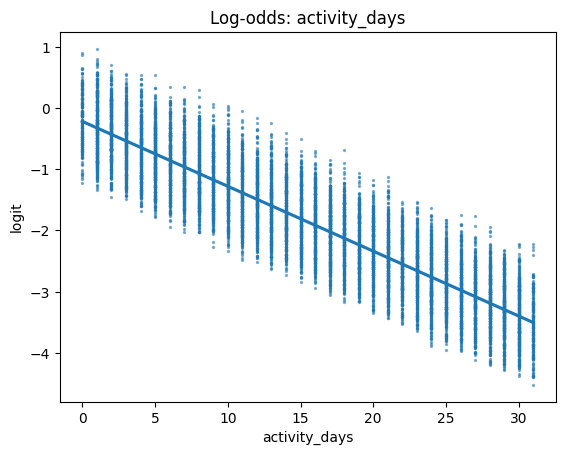

In [87]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

In [88]:
y_preds = model.predict(X_test)

In [89]:
model.score(X_test, y_test)

0.8240559440559441

In [90]:
cm = confusion_matrix(y_test, y_preds)

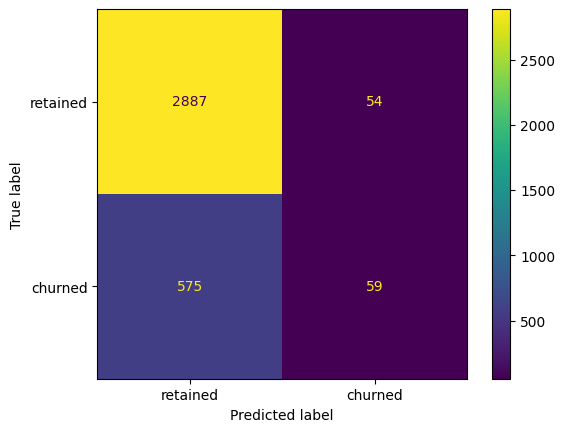

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();


In [92]:
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5221238938053098

In [93]:
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.09305993690851735

In [94]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



Note: The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

In [95]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0019056276539230587),
 ('total_navigations_fav1', 0.001216277884180754),
 ('total_navigations_fav2', 0.0009069657576784895),
 ('total_sessions', 0.0003098482020575647),
 ('duration_minutes_drives', 0.0001086754601621424),
 ('km_per_driving_day', 1.4507302771368065e-05),
 ('ID', 2.6926808721288957e-06),
 ('driven_km_drives', -1.4775414579621872e-05),
 ('n_days_after_onboarding', -0.00040874032904991876),
 ('percent_sessions_in_last_month', -0.0006573184590851026),
 ('device2', -0.0009070259046690581),
 ('professional_driver', -0.0016032007879982929),
 ('activity_days', -0.10650356550950107)]

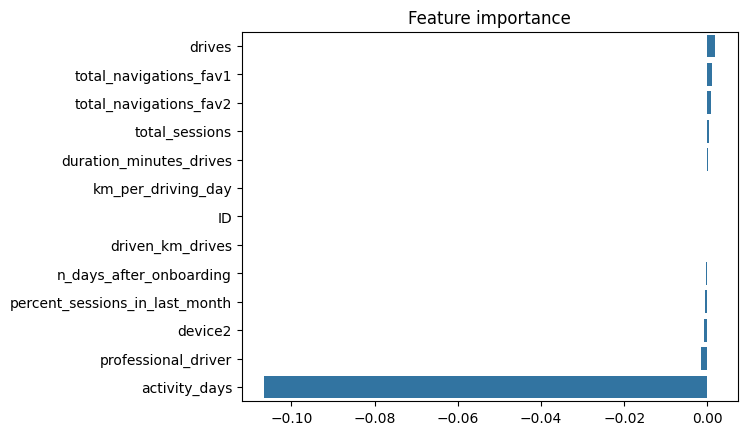

In [96]:

sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

# Machine Learning models

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import  RocCurveDisplay, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

In [98]:
df = Waze_data.copy()

In [100]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.237524e+02
75%      7.408162e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [101]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       566.943907
std        969.897544
min          0.000000
25%        136.168003
50%        273.301012
75%        543.473676
max       8889.794236
Name: km_per_driving_day, dtype: float64

In [102]:

# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 2. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14299.000000
mean         0.444101
std          0.278496
min          0.000000
25%          0.200241
50%          0.427865
75%          0.665012
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

In [103]:

# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [104]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

In [105]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14299.000000
mean         0.329996
std          1.292124
min          0.000298
25%          0.050818
50%          0.100457
75%          0.208580
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [106]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14299.000000
mean       189.444728
std        327.406069
min         72.013095
25%         92.887853
50%        121.231277
75%        191.157779
max      21800.540069
Name: km_per_hour, dtype: float64

In [107]:

# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.365859e+01
50%      7.429025e+01
75%      1.828194e+02
max               inf
Name: km_per_drive, dtype: float64

In [108]:
# 1. Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14299.000000
mean       225.797731
std        572.400481
min          0.000000
25%         32.910489
50%         72.319628
75%        177.431844
max       8889.794236
Name: km_per_drive, dtype: float64

In [109]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

# Get descriptive stats
df['percent_of_drives_to_favorite'].describe()

count    14299.000000
mean         1.575282
std          8.243636
min          0.000000
25%          0.212409
50%          0.648292
75%          1.593733
max        668.888397
Name: percent_of_drives_to_favorite, dtype: float64

In [110]:
# Drop rows with missing values
df = df.dropna(subset=['label'])

In [111]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [112]:

# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [113]:
# Drop `ID` column
df = df.drop(['ID'], axis=1)

In [114]:
# 1. Isolate X variables
X = df.drop(columns=['label', 'label2', 'device'])

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [115]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


### Random forest

In [116]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [ ]:

rf_cv.fit(X_train, y_train)

In [ ]:
# Examine best score
rf_cv.best_score_

In [ ]:
# Examine best hyperparameter combo
rf_cv.best_params_

In [ ]:

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [ ]:
results = make_results('RF cv', rf_cv, 'recall')
results

### XGBoost

In [ ]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [ ]:
xgb_cv.fit(X_train, y_train)


In [ ]:
xgb_cv.best_score_

In [ ]:
xgb_cv.best_params_

In [ ]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

In [ ]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [ ]:
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

In [ ]:
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

In [ ]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

In [ ]:
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

In [ ]:
plot_importance(xgb_cv.best_estimator_);

Questions:

Would you recommend using this model for churn prediction? Why or why not?
It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.

What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?
Splitting the data three ways means that there is less data available to train the model than splitting just two ways. However, performing model selection on a separate validation set enables testing of the champion model by itself on the test set, which gives a better estimate of future performance than splitting the data two ways and selecting a champion model by performance on the test data.

What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?
Logistic regression models are easier to interpret. Because they assign coefficients to predictor variables, they reveal not only which features factored most heavily into their final predictions, but also the directionality of the weight. In other words, they tell you if each feature is positively or negatively correlated with the target in the model's final prediction.

What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?
Tree-based model ensembles are often better predictors. If the most important thing is the predictive power of the model, then tree-based modeling will usually win out against logistic regression (but not always!). They also require much less data cleaning and require fewer assumptions about the underlying distributions of their predictor variables, so they're easier to work with.

What could you do to improve this model?
New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, the engineered features made up over half of the top 10 most-predictive features used by the model. It could also be helpful to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.

What additional features would you like to have to help improve the model?
It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.